# Part 0: Import package

In [1]:
import requests as r
import json
import pandas as pd
from datetime import datetime, date
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: 下載一天各類指數每5秒統計

In [2]:
url = "https://www.twse.com.tw/exchangeReport/MI_5MINS_INDEX?response=json&date=20200925"

In [3]:
r.get(url)

<Response [200]>

In [4]:
res = r.get(url)

In [5]:
res.json()

{'data': [['09:00:00',
   '12,264.38',
   '10,659.22',
   '13,652.88',
   '11,532.63',
   '158.12',
   '1,603.47',
   '210.49',
   '481.62',
   '193.85',
   '52.34',
   '102.60',
   '105.18',
   '68.87',
   '32.90',
   '256.86',
   '91.38',
   '245.10',
   '309.20',
   '587.70',
   '277.80',
   '111.66',
   '37.41',
   '119.41',
   '124.05',
   '118.34',
   '121.22',
   '74.88',
   '318.56',
   '60.64',
   '84.97',
   '1,166.39',
   '248.63',
   '104.32',
   '281.30'],
  ['09:00:05',
   '12,312.94',
   '10,703.49',
   '13,669.25',
   '11,540.15',
   '159.12',
   '1,608.89',
   '210.48',
   '481.86',
   '193.87',
   '52.33',
   '102.62',
   '105.21',
   '68.87',
   '32.90',
   '256.86',
   '91.38',
   '245.10',
   '309.23',
   '591.00',
   '280.08',
   '111.73',
   '37.50',
   '119.41',
   '124.27',
   '118.35',
   '121.22',
   '75.13',
   '318.51',
   '60.82',
   '84.94',
   '1,169.25',
   '248.63',
   '104.32',
   '281.29'],
  ['09:00:10',
   '12,329.62',
   '10,718.16',
   '13,692.05

In [6]:
stock_json = res.json()

In [7]:
stock_json['data']

[['09:00:00',
  '12,264.38',
  '10,659.22',
  '13,652.88',
  '11,532.63',
  '158.12',
  '1,603.47',
  '210.49',
  '481.62',
  '193.85',
  '52.34',
  '102.60',
  '105.18',
  '68.87',
  '32.90',
  '256.86',
  '91.38',
  '245.10',
  '309.20',
  '587.70',
  '277.80',
  '111.66',
  '37.41',
  '119.41',
  '124.05',
  '118.34',
  '121.22',
  '74.88',
  '318.56',
  '60.64',
  '84.97',
  '1,166.39',
  '248.63',
  '104.32',
  '281.30'],
 ['09:00:05',
  '12,312.94',
  '10,703.49',
  '13,669.25',
  '11,540.15',
  '159.12',
  '1,608.89',
  '210.48',
  '481.86',
  '193.87',
  '52.33',
  '102.62',
  '105.21',
  '68.87',
  '32.90',
  '256.86',
  '91.38',
  '245.10',
  '309.23',
  '591.00',
  '280.08',
  '111.73',
  '37.50',
  '119.41',
  '124.27',
  '118.35',
  '121.22',
  '75.13',
  '318.51',
  '60.82',
  '84.94',
  '1,169.25',
  '248.63',
  '104.32',
  '281.29'],
 ['09:00:10',
  '12,329.62',
  '10,718.16',
  '13,692.05',
  '11,561.58',
  '159.74',
  '1,610.21',
  '211.77',
  '482.40',
  '194.12',
  

In [8]:
pd.DataFrame.from_dict(stock_json['data'])

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,09:00:00,"12,264.38","10,659.22","13,652.88","11,532.63",158.12,"1,603.47",210.49,481.62,193.85,...,118.34,121.22,74.88,318.56,60.64,84.97,"1,166.39",248.63,104.32,281.30
1,09:00:05,"12,312.94","10,703.49","13,669.25","11,540.15",159.12,"1,608.89",210.48,481.86,193.87,...,118.35,121.22,75.13,318.51,60.82,84.94,"1,169.25",248.63,104.32,281.29
2,09:00:10,"12,329.62","10,718.16","13,692.05","11,561.58",159.74,"1,610.21",211.77,482.40,194.12,...,118.35,121.23,75.23,318.60,60.98,85.02,"1,170.70",248.63,104.31,281.34
3,09:00:15,"12,342.21","10,730.14","13,706.98","11,578.37",159.68,"1,610.19",211.96,483.08,194.46,...,118.62,121.14,75.35,319.15,61.04,85.02,"1,171.01",250.11,103.96,282.79
4,09:00:20,"12,348.42","10,736.04","13,721.52","11,595.32",159.52,"1,610.49",211.84,483.59,194.51,...,118.50,121.14,75.32,319.29,61.21,85.02,"1,171.17",250.14,103.98,283.62
5,09:00:25,"12,354.56","10,741.81","13,731.50","11,606.49",159.81,"1,610.83",211.92,485.30,195.27,...,118.51,121.14,75.35,319.59,61.29,85.02,"1,171.39",250.37,103.99,283.83
6,09:00:30,"12,359.87","10,746.80","13,735.25","11,610.24",159.97,"1,610.83",211.83,485.49,195.28,...,118.60,121.23,75.35,319.83,61.41,85.23,"1,171.57",250.47,103.99,283.84
7,09:00:35,"12,362.05","10,748.37","13,739.82","11,613.70",159.87,"1,610.93",211.87,485.52,195.59,...,118.87,121.25,75.31,319.71,61.43,85.23,"1,172.06",250.49,103.99,284.08
8,09:00:40,"12,363.83","10,750.36","13,740.61","11,615.56",159.87,"1,610.97",211.88,485.91,195.58,...,118.99,121.27,75.37,319.65,61.43,85.26,"1,171.85",250.51,103.99,284.06
9,09:00:45,"12,365.69","10,751.87","13,744.60","11,619.23",159.81,"1,610.97",212.12,486.14,195.59,...,119.00,121.40,75.44,319.69,61.46,85.18,"1,172.12",250.71,103.99,284.06


In [9]:
stock_df = pd.DataFrame.from_dict(stock_json['data'])
stock_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,09:00:00,"12,264.38","10,659.22","13,652.88","11,532.63",158.12,"1,603.47",210.49,481.62,193.85,...,118.34,121.22,74.88,318.56,60.64,84.97,"1,166.39",248.63,104.32,281.30
1,09:00:05,"12,312.94","10,703.49","13,669.25","11,540.15",159.12,"1,608.89",210.48,481.86,193.87,...,118.35,121.22,75.13,318.51,60.82,84.94,"1,169.25",248.63,104.32,281.29
2,09:00:10,"12,329.62","10,718.16","13,692.05","11,561.58",159.74,"1,610.21",211.77,482.40,194.12,...,118.35,121.23,75.23,318.60,60.98,85.02,"1,170.70",248.63,104.31,281.34
3,09:00:15,"12,342.21","10,730.14","13,706.98","11,578.37",159.68,"1,610.19",211.96,483.08,194.46,...,118.62,121.14,75.35,319.15,61.04,85.02,"1,171.01",250.11,103.96,282.79
4,09:00:20,"12,348.42","10,736.04","13,721.52","11,595.32",159.52,"1,610.49",211.84,483.59,194.51,...,118.50,121.14,75.32,319.29,61.21,85.02,"1,171.17",250.14,103.98,283.62


In [10]:
stock_json['fields']

['時間',
 '發行量加權股價指數',
 '未含金融保險股指數',
 '未含電子股指數',
 '未含金融電子股指數',
 '水泥類指數',
 '食品類指數',
 '塑膠類指數',
 '紡織纖維類指數',
 '電機機械類指數',
 '電器電纜類指數',
 '化學生技醫療類指數',
 '化學類指數',
 '生技醫療類指數',
 '玻璃陶瓷類指數',
 '造紙類指數',
 '鋼鐵類指數',
 '橡膠類指數',
 '汽車類指數',
 '電子類指數',
 '半導體類指數',
 '電腦及週邊設備類指數',
 '光電類指數',
 '通信網路類指數',
 '電子零組件類指數',
 '電子通路類指數',
 '資訊服務類指數',
 '其他電子類指數',
 '建材營造類指數',
 '航運類指數',
 '觀光類指數',
 '金融保險類指數',
 '貿易百貨類指數',
 '油電燃氣類指數',
 '其他類指數']

In [11]:
stock_df.columns = stock_json['fields']

In [12]:
stock_df.head()

,時間,發行量加權股價指數,未含金融保險股指數,未含電子股指數,未含金融電子股指數,水泥類指數,食品類指數,塑膠類指數,紡織纖維類指數,電機機械類指數,...,電子通路類指數,資訊服務類指數,其他電子類指數,建材營造類指數,航運類指數,觀光類指數,金融保險類指數,貿易百貨類指數,油電燃氣類指數,其他類指數
0,09:00:00,"12,264.38","10,659.22","13,652.88","11,532.63",158.12,"1,603.47",210.49,481.62,193.85,...,118.34,121.22,74.88,318.56,60.64,84.97,"1,166.39",248.63,104.32,281.30
1,09:00:05,"12,312.94","10,703.49","13,669.25","11,540.15",159.12,"1,608.89",210.48,481.86,193.87,...,118.35,121.22,75.13,318.51,60.82,84.94,"1,169.25",248.63,104.32,281.29
2,09:00:10,"12,329.62","10,718.16","13,692.05","11,561.58",159.74,"1,610.21",211.77,482.40,194.12,...,118.35,121.23,75.23,318.60,60.98,85.02,"1,170.70",248.63,104.31,281.34
3,09:00:15,"12,342.21","10,730.14","13,706.98","11,578.37",159.68,"1,610.19",211.96,483.08,194.46,...,118.62,121.14,75.35,319.15,61.04,85.02,"1,171.01",250.11,103.96,282.79
4,09:00:20,"12,348.42","10,736.04","13,721.52","11,595.32",159.52,"1,610.49",211.84,483.59,194.51,...,118.50,121.14,75.32,319.29,61.21,85.02,"1,171.17",250.14,103.98,283.62


# Part 2: 下載一天各類指數每5秒統計 by function

In [13]:
def get_stock_daily(year, month, day):
    stock_date = str(date(year, month, day).strftime("%Y%m%d"))    
    df = pd.DataFrame()
    url = "https://www.twse.com.tw/exchangeReport/MI_5MINS_INDEX?response=json&date=" + stock_date
    res = r.get(url)
    stock_json = res.json()
    stock_df = pd.DataFrame.from_dict(stock_json['data'])
    df = df.append(stock_df, ignore_index = True)    
    df.columns = stock_json['fields'] 
    return df

In [14]:
daily_stock = get_stock_daily(2020, 9, 25)
print("daily_stock row counts:", daily_stock.shape[0], "\ndaily_stock column counts:", daily_stock.shape[1])
daily_stock.head()

daily_stock row counts: 3241 
daily_stock column counts: 35


,時間,發行量加權股價指數,未含金融保險股指數,未含電子股指數,未含金融電子股指數,水泥類指數,食品類指數,塑膠類指數,紡織纖維類指數,電機機械類指數,...,電子通路類指數,資訊服務類指數,其他電子類指數,建材營造類指數,航運類指數,觀光類指數,金融保險類指數,貿易百貨類指數,油電燃氣類指數,其他類指數
0,09:00:00,"12,264.38","10,659.22","13,652.88","11,532.63",158.12,"1,603.47",210.49,481.62,193.85,...,118.34,121.22,74.88,318.56,60.64,84.97,"1,166.39",248.63,104.32,281.30
1,09:00:05,"12,312.94","10,703.49","13,669.25","11,540.15",159.12,"1,608.89",210.48,481.86,193.87,...,118.35,121.22,75.13,318.51,60.82,84.94,"1,169.25",248.63,104.32,281.29
2,09:00:10,"12,329.62","10,718.16","13,692.05","11,561.58",159.74,"1,610.21",211.77,482.40,194.12,...,118.35,121.23,75.23,318.60,60.98,85.02,"1,170.70",248.63,104.31,281.34
3,09:00:15,"12,342.21","10,730.14","13,706.98","11,578.37",159.68,"1,610.19",211.96,483.08,194.46,...,118.62,121.14,75.35,319.15,61.04,85.02,"1,171.01",250.11,103.96,282.79
4,09:00:20,"12,348.42","10,736.04","13,721.52","11,595.32",159.52,"1,610.49",211.84,483.59,194.51,...,118.50,121.14,75.32,319.29,61.21,85.02,"1,171.17",250.14,103.98,283.62


# Part 3: 將下載的當日大盤指數每5秒統計資料另存成csv檔

In [15]:
daily_stock.to_csv("2020_09_25_Daily_Stock.csv")

# Part 4: 當日大盤指數每5秒統計視覺化

In [16]:
daily_stock = daily_stock[['時間', '發行量加權股價指數']]
daily_stock.head()

,時間,發行量加權股價指數
0,09:00:00,"12,264.38"
1,09:00:05,"12,312.94"
2,09:00:10,"12,329.62"
3,09:00:15,"12,342.21"
4,09:00:20,"12,348.42"


In [17]:
for row in range(daily_stock.shape[0]):
    daily_stock.iloc[row, 1] = float(daily_stock.iloc[row,1].replace(',', ''))

daily_stock.head()

,時間,發行量加權股價指數
0,09:00:00,12264.4
1,09:00:05,12312.9
2,09:00:10,12329.6
3,09:00:15,12342.2
4,09:00:20,12348.4


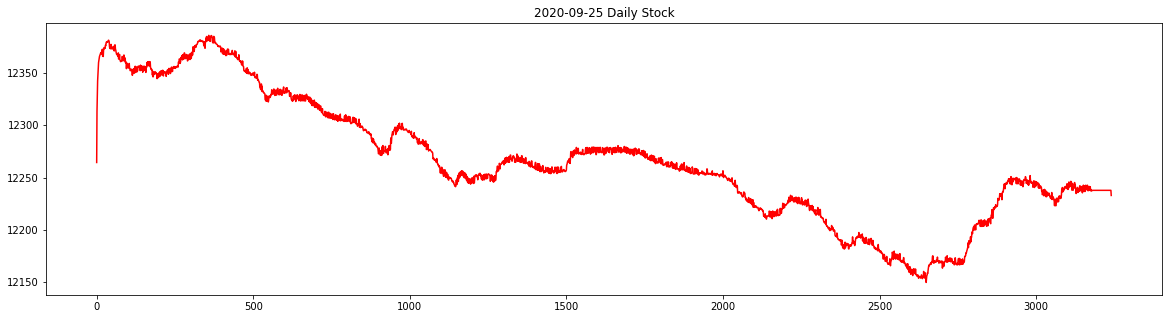

In [18]:
fig = plt.figure(figsize = (20, 5))
plt.plot(daily_stock["發行量加權股價指數"], color = "red")
plt.title("2020-09-25 Daily Stock")
plt.show();

# Bonus: 下載多天各類指數每5秒統計 by function

In [19]:
def get_stock_daily(start_year, start_month, start_day, end_year, end_month, end_day):
    start_date = str(date(start_year, start_month, start_day))
    end_date = str(date(end_year, end_month, end_day))
    day_list = pd.date_range(start_date, end_date, freq='D').strftime("%Y%m%d").tolist()

    df = pd.DataFrame()
    for day in day_list:    
        url = "https://www.twse.com.tw/exchangeReport/MI_5MINS_INDEX?response=json&date=" + day
        res = r.get(url)
        stock_json = res.json()
        stock_df = pd.DataFrame.from_dict(stock_json['data'])
        df = df.append(stock_df, ignore_index = True)    
        time.sleep(5)
    df.columns = stock_json['fields'] 
    return df

In [20]:
get_stock_daily(2020, 9, 24, 2020, 9, 25)

,時間,發行量加權股價指數,未含金融保險股指數,未含電子股指數,未含金融電子股指數,水泥類指數,食品類指數,塑膠類指數,紡織纖維類指數,電機機械類指數,...,電子通路類指數,資訊服務類指數,其他電子類指數,建材營造類指數,航運類指數,觀光類指數,金融保險類指數,貿易百貨類指數,油電燃氣類指數,其他類指數
0,09:00:00,"12,583.88","10,937.04","14,050.43","11,884.42",162.20,"1,654.49",216.29,497.32,198.78,...,121.06,123.03,76.49,328.15,62.20,86.61,"1,196.66",254.93,107.17,291.83
1,09:00:05,"12,487.48","10,847.82","14,024.57","11,872.69",160.76,"1,654.01",216.29,497.28,198.60,...,121.01,123.03,76.05,326.90,62.01,86.57,"1,192.11",254.91,107.17,291.76
2,09:00:10,"12,459.95","10,825.05","13,988.95","11,845.01",160.76,"1,645.04",214.87,497.23,198.29,...,120.99,123.01,75.96,326.24,61.87,86.55,"1,188.51",254.91,107.16,291.74
3,09:00:15,"12,443.91","10,812.80","13,954.31","11,815.77",160.16,"1,641.94",213.79,492.57,197.74,...,120.48,123.01,75.98,326.02,61.78,86.55,"1,185.55",254.91,107.16,291.41
4,09:00:20,"12,436.38","10,805.63","13,933.57","11,791.38",160.12,"1,641.45",213.92,492.26,197.37,...,120.47,123.01,75.94,325.45,61.67,86.55,"1,185.36",253.71,106.41,290.32
5,09:00:25,"12,429.83","10,800.44","13,918.96","11,778.22",160.01,"1,639.88",213.78,492.21,196.24,...,120.50,122.91,75.94,325.11,61.60,86.55,"1,184.31",253.74,106.41,289.48
6,09:00:30,"12,426.94","10,797.43","13,909.95","11,766.61",160.19,"1,639.84",213.76,492.02,196.22,...,120.18,122.91,75.95,324.68,61.52,86.34,"1,184.46",253.70,106.40,289.22
7,09:00:35,"12,420.87","10,792.13","13,898.75","11,755.42",159.89,"1,638.95",213.76,491.75,196.05,...,120.23,122.46,75.92,324.54,61.49,86.11,"1,183.90",253.12,106.16,289.05
8,09:00:40,"12,417.62","10,788.72","13,894.73","11,749.69",159.89,"1,638.93",213.65,491.56,195.92,...,120.20,122.25,75.84,324.26,61.47,85.94,"1,184.10",253.11,106.16,288.81
9,09:00:45,"12,416.75","10,788.22","13,892.06","11,747.76",159.94,"1,638.76",213.65,491.44,195.92,...,120.18,122.24,75.91,324.21,61.45,85.97,"1,183.80",253.04,106.16,288.65
